In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r"C:\Users\hey\OneDrive\Bureau\OpenADR\simulated_monthly_energy_data.csv", parse_dates=["Date"])
df.head()

,Date,Temperature,Humidity,TransformerTemperature,Demand
0,2024-01-01 00:00:00,20.783007,41.536730,25.524450,512.344365
1,2024-01-01 01:00:00,34.045202,44.559823,37.150088,576.276523
2,2024-01-01 02:00:00,15.997203,68.613378,19.117537,448.066090
3,2024-01-01 03:00:00,17.998185,33.776354,21.148789,515.803855
4,2024-01-01 04:00:00,25.751623,71.379061,30.261483,486.375741


In [4]:
df["Temp_Lag"] = df["Temperature"].shift(24)  # Lag by 1 day
df["Humidity_Lag"] = df["Humidity"].shift(24)  # Lag by 1 day
data = df.dropna()

In [24]:
X = df[["Temp_Lag", "Humidity_Lag"]]
y = df["Demand"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict demand
y_pred = rf_model.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

37.865489877393316


In [27]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

46.26041695812181


c:\Users\hey\anaconda3\anaconda_nihed\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
df["Demand"]

0      512.344365
1      576.276523
2      448.066090
3      515.803855
4      486.375741
          ...    
739    558.472089
740    580.994498
741    545.697103
742    463.284872
743    533.597315
Name: Demand, Length: 744, dtype: float64

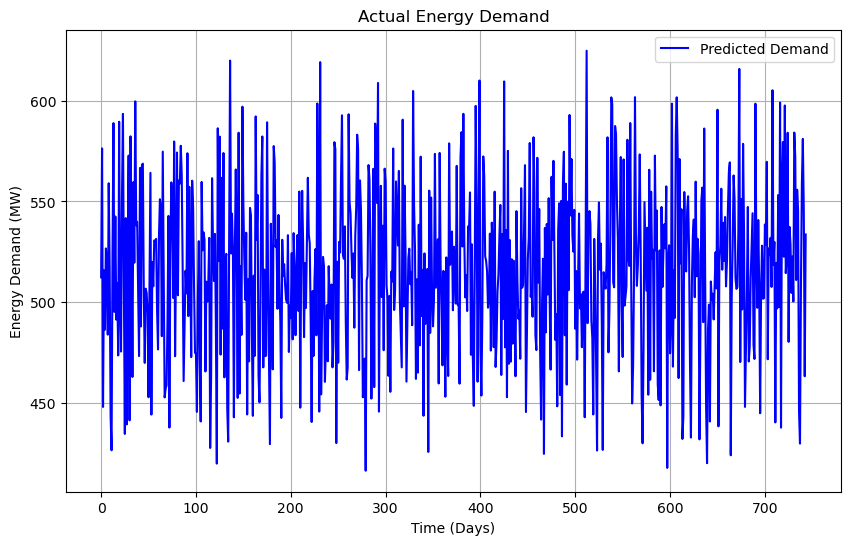

In [36]:
actual_data = y# Actual energy demand
# Plot
plt.figure(figsize=(10, 6))
plt.plot(actual_data, label='Predicted Demand', color='blue')
plt.xlabel('Time (Days)')
plt.ylabel('Energy Demand (MW)')
plt.title('Actual Energy Demand')
plt.legend()
plt.grid(True)
plt.show()

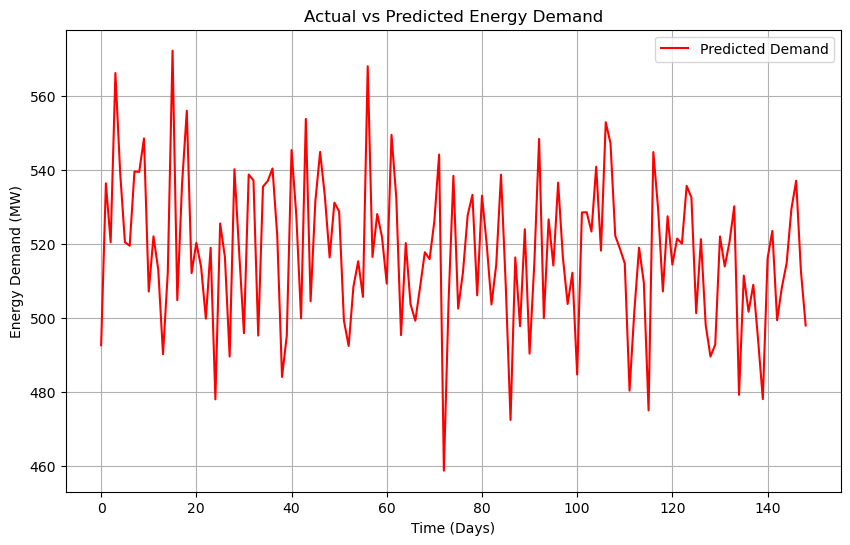

In [ ]:
predicted_data = y_pred  # Predicted energy demand

# Plot
plt.figure(figsize=(10, 6))
plt.plot(predicted_data, label='Predicted Demand', color='red')
plt.xlabel('Time (Days)')
plt.ylabel('Energy Demand (MW)')
plt.title('Actual vs Predicted Energy Demand')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# threshold classification using KNN
thresholds = {"Optimize": 0, "Raise": 1}
df["Demand_Category"] = np.where(df["Demand"] > df["Demand"].mean(), 1, 0)


In [18]:
X_knn = data[["Temperature", "Humidity"]]
y_knn = data["Demand_Category"]

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_knn, y_knn)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# Train KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_knn, y_knn)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Decision logic
def adjust_production(predicted_demand, threshold=1000):
    if predicted_demand > threshold:
        action = "Raise Production"
        adjustment = f"Increase production by {predicted_demand - threshold:.2f} MW"
    else:
        action = "Optimize Production"
        adjustment = f"Reduce production by {threshold - predicted_demand:.2f} MW"
    return action, adjustment

In [39]:
##test!
predicted_demand = 1050  # MW
threshold = 1000  # MW 
action, adjustment = adjust_production(predicted_demand, threshold)

print(f"Action: {action}")
print(f"Adjustment Needed: {adjustment}")

Action: Raise Production
Adjustment Needed: Increase production by 50.00 MW


In [49]:
class VTN:
    def __init__(self):
        self.signals = []

    def send_signal(self, ven_id, action, adjustment):
        signal = {"ven_id": ven_id, "action": action, "adjustment": adjustment}
        self.signals.append(signal)
        print(f"Signal sent to VEN {ven_id}: {action} with {adjustment}")
        return signal


class VEN:
    def __init__(self, ven_id):
        self.ven_id = ven_id

    def receive_signal(self, signal):
        if signal["ven_id"] == self.ven_id:
            print(f"VEN {self.ven_id} received signal: {signal['action']} - {signal['adjustment']}")
        else:
            print(f"Signal not intended for VEN {self.ven_id}")


vtn = VTN()
ven = VEN(ven_id="client_1")

# Simulate a prediction and decision
predicted_demand = 1050 
threshold = 1000

if predicted_demand > threshold:
    action = "Raise Production"
    adjustment = f"Increase production by {predicted_demand - threshold:.2f} MW"
else:
    action = "Optimize Production"
    adjustment = f"Reduce production by {threshold - predicted_demand:.2f} MW"

# VTN sends signal to VEN
signal = vtn.send_signal(ven.ven_id, action, adjustment)

# VEN processes the signal
ven.receive_signal(signal)


Signal sent to VEN client_1: Raise Production with Increase production by 50.00 MW
VEN client_1 received signal: Raise Production - Increase production by 50.00 MW


In [45]:
###test model :
new_data=pd.read_csv(r"C:\Users\hey\OneDrive\Bureau\OpenADR\energy_test_data.csv")
new_data.head()

,date,temp,humidity,demand
0,2024-12-01,22.490802,55.115724,1065.747502
1,2024-12-02,34.014286,51.951548,971.350665
2,2024-12-03,29.639879,78.466566,956.186902
3,2024-12-04,26.973170,78.968961,1008.539217
4,2024-12-05,18.120373,74.251920,928.184845


In [50]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
X_train = new_data[["temp", "humidity"]]
y_train = new_data["demand"]
rf_model.fit(X_train, y_train)

# Make predictions on new data
X_new = new_data[["temp", "humidity"]]
new_data['predicted_demand'] = rf_model.predict(X_new)

# Define threshold logic
threshold = 1000
new_data['action'] = new_data['predicted_demand'].apply(
    lambda x: "Raise Production" if x > threshold else "Optimize Production"
)
new_data['adjustment'] = new_data['predicted_demand'].apply(
    lambda x: f"Increase production by {x - threshold:.2f} MW" if x > threshold else f"Reduce production by {threshold - x:.2f} MW"
)

# Display the results
print(new_data[['date', 'temp', 'humidity', 'predicted_demand', 'action', 'adjustment']])

          date       temp   humidity  predicted_demand               action  \
0   2024-12-01  22.490802  55.115724       1062.616168     Raise Production   
1   2024-12-02  34.014286  51.951548       1014.152300     Raise Production   
2   2024-12-03  29.639879  78.466566        972.387542  Optimize Production   
3   2024-12-04  26.973170  78.968961        993.427295  Optimize Production   
4   2024-12-05  18.120373  74.251920        945.899435  Optimize Production   
5   2024-12-06  18.119890  59.138413       1020.526896     Raise Production   
6   2024-12-07  16.161672  52.930163        949.698785  Optimize Production   
7   2024-12-08  32.323523  70.526991       1069.161645     Raise Production   
8   2024-12-09  27.022300  63.204575       1021.164338     Raise Production   
9   2024-12-10  29.161452  53.661147        969.461977  Optimize Production   
10  2024-12-11  15.411690  64.855307        934.060457  Optimize Production   
11  2024-12-12  34.398197  51.031656       1046.9797

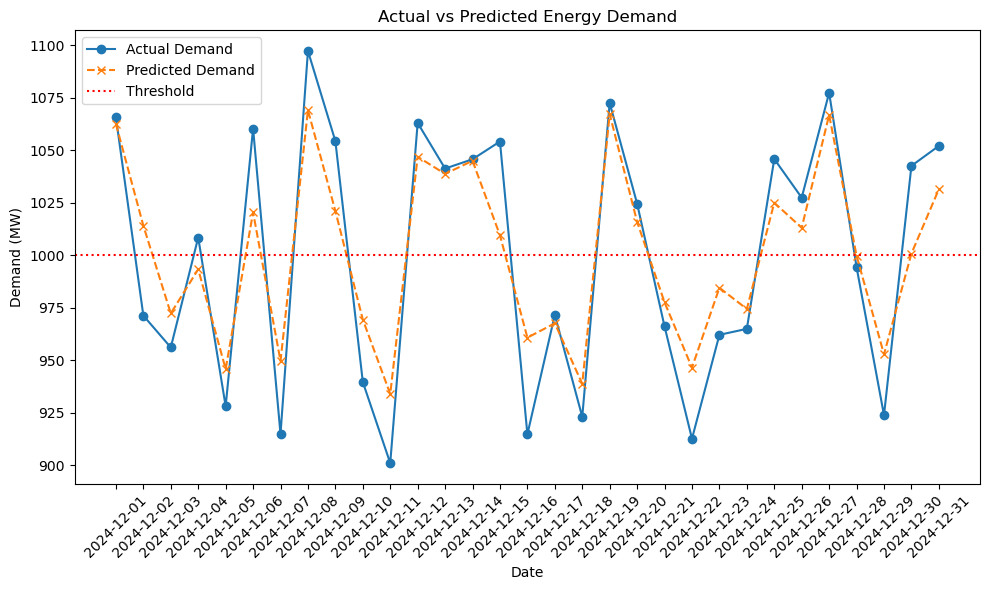

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(new_data['date'], new_data['demand'], label='Actual Demand', marker='o')
plt.plot(new_data['date'], new_data['predicted_demand'], label='Predicted Demand', linestyle='--', marker='x')
plt.axhline(threshold, color='red', linestyle=':', label='Threshold')
plt.xlabel('Date')
plt.ylabel('Demand (MW)')
plt.title('Actual vs Predicted Energy Demand')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
